In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
df = pd.read_csv('AirPassengers.csv',usecols=[1]).values

In [3]:
df[:5]

array([[112],
       [118],
       [132],
       [129],
       [121]])

In [4]:
df.shape

(144, 1)

In [5]:
df = df.reshape(-1)
print(df.shape)

(144,)


In [6]:
df[:5]

array([112, 118, 132, 129, 121])

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df_norm = scaler.fit_transform(df[:,np.newaxis])
print(df_norm[:5])

[[0.01544402]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]]


In [13]:
df_norm = df_norm.reshape(-1)
print(df_norm.shape)

(144,)


In [7]:
delay = 10
def prepare_data(data,delay):
  X = []
  Y = []
  for i in range(len(data)-delay-1):
    window = data[i:i+delay]
    X.append(window)
    Y.append(data[i+delay])
  return np.array(X), np.array(Y)

In [14]:
X,Y = prepare_data(df_norm,delay)
print(X.shape,Y.shape)

(133, 10) (133,)


In [15]:
print(X[:3],Y[:3])

[[0.01544402 0.02702703 0.05405405 0.04826255 0.03281853 0.05984556
  0.08494208 0.08494208 0.06177606 0.02895753]
 [0.02702703 0.05405405 0.04826255 0.03281853 0.05984556 0.08494208
  0.08494208 0.06177606 0.02895753 0.        ]
 [0.05405405 0.04826255 0.03281853 0.05984556 0.08494208 0.08494208
  0.06177606 0.02895753 0.         0.02702703]] [0.         0.02702703 0.02123552]


In [16]:
X_train, X_test = X[0:100,:], X[100:,:]
Y_train, Y_test = Y[0:100], Y[100:]
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(100, 10) (33, 10) (100,) (33,)


In [43]:
X_train_f = []
for x in X_train:
  X_train_f.append(x.reshape((len(x),1)))
X_train_f = np.array(X_train_f)

In [44]:
X_test_f = []
for x in X_test:
  X_test_f.append(x.reshape((len(x),1)))
X_test_f = np.array(X_test_f)

In [45]:
print(X_train_f.shape,X_test_f.shape)

(100, 10, 1) (33, 10, 1)


In [10]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [79]:
model = Sequential()
model.add(layers.LSTM(50,input_shape=(delay,1),return_sequences=True))
model.add(layers.LSTM(50))
model.add(layers.Dense(32))
model.add(layers.Dense(1))
model.compile(optimizer='adam',loss='mse')

In [80]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 10, 50)            10400     
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1632      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 32,265
Trainable params: 32,265
Non-trainable params: 0
_________________________________________________________________


In [81]:
Y_train.shape

(100,)

In [82]:
H = model.fit(X_train_f,Y_train,epochs=100,batch_size=5,validation_data=(X_test_f,Y_test))

Epoch 1/100
20/20 [==============================] - 1s 51ms/step - loss: 0.0273 - val_loss: 0.0540
Epoch 2/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0086 - val_loss: 0.0261
Epoch 3/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0089 - val_loss: 0.0255
Epoch 4/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0080 - val_loss: 0.0275
Epoch 5/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0082 - val_loss: 0.0325
Epoch 6/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0070 - val_loss: 0.0254
Epoch 7/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0081 - val_loss: 0.0250
Epoch 8/100
20/20 [==============================] - 0s 9ms/step - loss: 0.0078 - val_loss: 0.0256
Epoch 9/100
20/20 [==============================] - 0s 9ms/step - loss: 0.0071 - val_loss: 0.0291
Epoch 10/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0074 - val_loss: 0.0244
Epoch 11

In [55]:
from sklearn.metrics import mean_squared_error
import math

In [93]:
trainPredict = model.predict(X_train_f)
testPredict = model.predict(X_test_f)

In [94]:
print(trainPredict.shape,Y_train.shape)

(100, 1) (100,)


In [95]:
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)
Y_train_inv = scaler.inverse_transform(Y_train[:,np.newaxis])
Y_test_inv = scaler.inverse_transform(Y_test[:,np.newaxis])

In [96]:
print(trainPredict.shape,Y_train_inv.shape)

(100, 1) (100, 1)


In [97]:
trainScore = math.sqrt(mean_squared_error(Y_train_inv.reshape(-1),trainPredict.reshape(-1)))
testScore = math.sqrt(mean_squared_error(Y_test_inv.reshape(-1),testPredict.reshape(-1)))
print(trainScore,testScore)

19.648014524671257 38.20287322362029


In [90]:
Y_train_inv[:5]

array([[104.],
       [118.],
       [115.],
       [126.],
       [141.]])

In [91]:
trainPredict[:5]

array([[110.72614],
       [100.8102 ],
       [113.24766],
       [113.14335],
       [122.90743]], dtype=float32)

In [106]:
plt.style.use("dark_background")

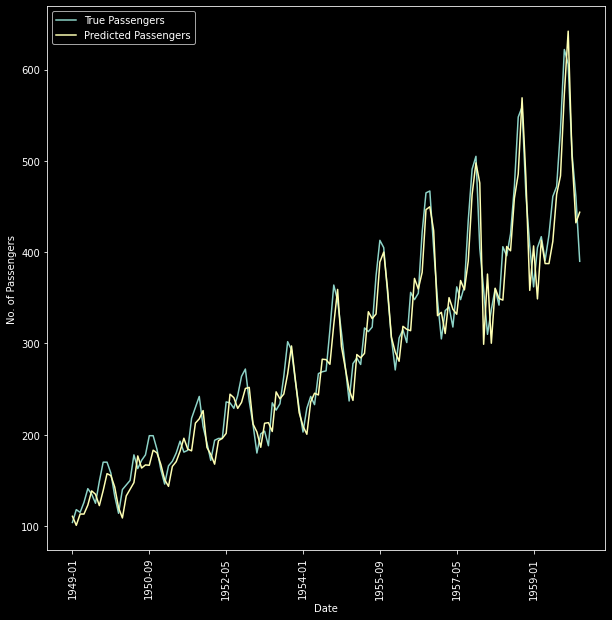

In [136]:
plt.figure(figsize=(10,10))
trueData = np.concatenate((Y_train_inv.reshape(-1),Y_test_inv.reshape(-1)),axis=0)
predData = np.concatenate((trainPredict.reshape(-1),testPredict.reshape(-1)),axis=0)
plt.plot(trueData, label='True Passengers')
#plt.plot(Y_test_inv.reshape(-1), label = 'True Test Data')
plt.plot(predData, label = 'Predicted Passengers')
#plt.plot(testPredict.reshape(-1), label = 'Pred Test Data')
plt.xticks(ticks=a,labels=list(passengers[a]),rotation='vertical')
plt.xlabel('Date')
plt.ylabel('No. of Passengers')
plt.legend()
plt.show()

In [103]:
trueData = np.concatenate((Y_train_inv.reshape(-1),Y_test_inv.reshape(-1)),axis=0)

In [104]:
trueData.shape

(133,)

In [120]:
passengers = pd.read_csv('AirPassengers.csv',usecols=[0]).values

In [121]:
len(passengers)

144

In [122]:
passengers = passengers[:len(passengers)-delay-1]

In [123]:
len(passengers)

133

In [125]:
passengers = passengers.reshape(-1)

In [126]:
passengers[:5]

array(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05'],
      dtype=object)

In [132]:
a = np.arange(0,133,20)

In [133]:
a

array([  0,  20,  40,  60,  80, 100, 120])

In [134]:
passengers[a]

array(['1949-01', '1950-09', '1952-05', '1954-01', '1955-09', '1957-05',
       '1959-01'], dtype=object)